#                                  MINOR PROJECT 

***Project Name:***
Artifical intelligence june minor project 

** Project Description **

***problem statement: ***
Create a deep learning model to predict the different hand written digits ranging from 0 to 9 

#  steps to consider 
1. Normalize images by dividing pixels by 255(if required )
2. Convert labels to catergories ( if requried) 
3. Build a CNN Architecture 
4. Execute the model for appropriatee number of epochs 
5. Depict loss vs  val_loss on line chart 
6. Depict accuracy vs  val_accuracy on line chart 
7. Generate predictions on test_data
8. Compute Confusion matrix and classification report 


#  Starting of the program 

**Things which i used in this program (import )** 
1. keras 
2. matplotlib
3. pandas 
4.numpy 

**imported mnist from keras.datasets**

In [5]:
import keras 
from keras.datasets import mnist 

#the data , split between train and test sets 

((x_train,y_train),(x_test,y_test))=mnist.load_data()

**Preproessing the datasets**

In [6]:

x_train=x_train.reshape((x_train.shape[0],28*28)).astype('float32')
x_test=x_test.reshape((x_test.shape[0],28*28)).astype('float32')

**1.Normalize images by dividing pixels by 255**

In [7]:
x_train=x_train/255
x_test=x_test/255

**2.Converting  labels to catergories**

In [8]:
print(y_test.shape)
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

num_classes=y_test.shape[1]
print(y_test.shape)


(10000,)
(10000, 10)


**3.Building a CNN Architecture** 

In [9]:
from keras.models import Sequential 
from keras.layers import Dense 

input_shape=(28,28,1)
model=Sequential()
model.add(Dense(32,input_dim=28*28,activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


**4.Executing  the model for 10 number of epochs**

In [11]:
SH=model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test,y_test))


Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 0.4588 - accuracy: 0.8686 - val_loss: 0.2534 - val_accuracy: 0.9260
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2170 - accuracy: 0.9371 - val_loss: 0.1892 - val_accuracy: 0.9452
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1677 - accuracy: 0.9506 - val_loss: 0.1721 - val_accuracy: 0.9503
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1392 - accuracy: 0.9585 - val_loss: 0.1404 - val_accuracy: 0.9581
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1204 - accuracy: 0.9644 - val_loss: 0.1548 - val_accuracy: 0.9541
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1069 - accuracy: 0.9683 - val_loss: 0.1180 - val_accuracy: 0.9647
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0945 - accuracy: 0.9714 - val_loss: 0.1210 - val_accuracy: 0.9633
Epoch 

In [12]:
scores=model.evaluate(x_test,y_test)
print(scores)

313/313 [==============================] - 1s 2ms/step - loss: 0.1095 - accuracy: 0.9674
[0.10950674116611481, 0.9674000144004822]


**5. Depictt loss vs  val_loss on line chart**

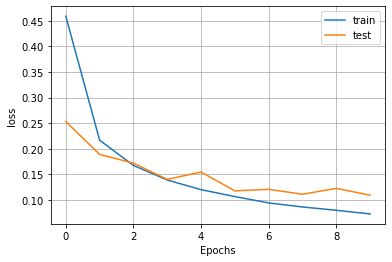

In [13]:
import matplotlib.pyplot as plt
import pandas as pd 
r1=pd.DataFrame(SH.history)
r1['Epochs']=SH.epoch
plt.plot(r1['Epochs'],r1['loss'],label='train')
plt.plot(r1['Epochs'],r1['val_loss'],label='test')
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.grid()
plt.show()

**6. Depict accuracy vs  val_accuracy on line chart**

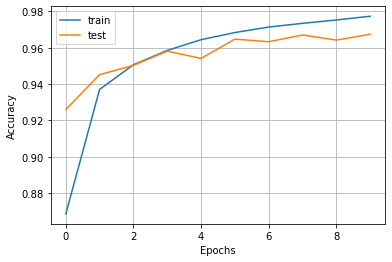

In [14]:

plt.plot(r1['Epochs'],r1['accuracy'],label='train')
plt.plot(r1['Epochs'],r1['val_accuracy'],label='test')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

**7. Generating predictions on test_data**

In [20]:
from sklearn.metrics import confusion_matrix ,classification_report
 

y_pred =model.predict(x_test,batch_size=128,verbose=0)

y_pred[1]

array([8.0916536e-09, 1.2765428e-03, 9.9871731e-01, 2.2683023e-06,
       1.1798933e-12, 2.0246928e-07, 3.4622790e-06, 6.9966609e-11,
       1.9379802e-07, 2.5656265e-13], dtype=float32)

In [21]:
y_test[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [22]:
import numpy as np 
sh1=np.argmax(y_test,axis=1)
sh1[1]

2

**8. Computing  Confusion matrix and classification report**

In [25]:
cm=confusion_matrix(sh1,y_pred.argmax(axis=1))
cm

array([[ 971,    0,    1,    2,    0,    1,    2,    1,    1,    1],
       [   0, 1124,    3,    1,    0,    1,    3,    1,    2,    0],
       [   7,    3,  993,    4,    1,    0,    7,    7,    9,    1],
       [   0,    1,    5,  983,    0,    2,    0,    9,   10,    0],
       [   2,    0,    8,    1,  938,    0,    7,    4,    0,   22],
       [   7,    4,    2,   25,    1,  832,    8,    2,    7,    4],
       [  10,    3,    0,    1,    2,    2,  939,    0,    1,    0],
       [   1,    6,    9,    4,    1,    0,    0, 1000,    0,    7],
       [   4,    1,    2,   10,    4,    6,    7,    7,  930,    3],
       [   5,    5,    1,   11,    9,    3,    0,    9,    2,  964]],
      dtype=int64)

In [26]:
print(classification_report(sh1,y_pred.argmax(axis=1)))


              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.96      0.97      1032
           3       0.94      0.97      0.96      1010
           4       0.98      0.96      0.97       982
           5       0.98      0.93      0.96       892
           6       0.97      0.98      0.97       958
           7       0.96      0.97      0.97      1028
           8       0.97      0.95      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



**done by**
**name:** Thogaruchesti Hemanth<br>
**Batch:** june 